In [10]:
%load_ext autoreload
%autoreload 2

import graphviz
import tempfile
from IPython.display import Markdown, display
try: 
    from docs.helpers import plot_cwl, wrap_cwl
except (ImportError, ModuleNotFoundError) as e:

    import os
    import sys
    module_path = os.path.abspath(os.path.join('.')) # or the path to your source code
    sys.path.insert(0, module_path)
    from helpers import plot_cwl, wrap_cwl

import cwl_utils
import cwl_utils.parser
from cwl_utils.parser import load_document_by_yaml, load_document
import yaml
from io import StringIO

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Pattern 1 - one input/one output

The CWL includes: 
- one input parameter of type `Directory`
- one output parameter of type `Directory`

This scenario typically takes one input, applies an algorithm and produces a result

Implementation: delineate water bodies using NDWI and Otsu automatic threshold taking as input a Landsat-9 acquisition


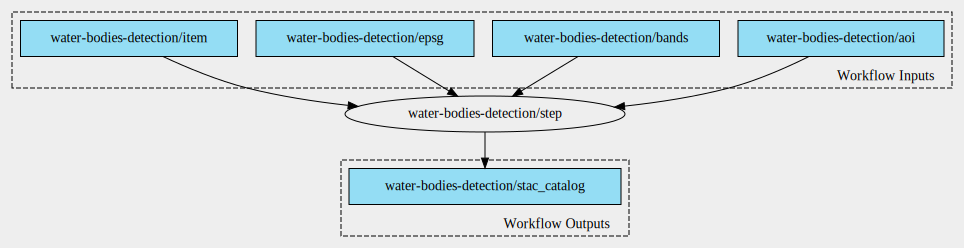

In [2]:
app_cwl_file = '../cwl-workflow/pattern-1.cwl'
graphviz.Source(plot_cwl(app_cwl_file, "water-bodies-detection"))

True


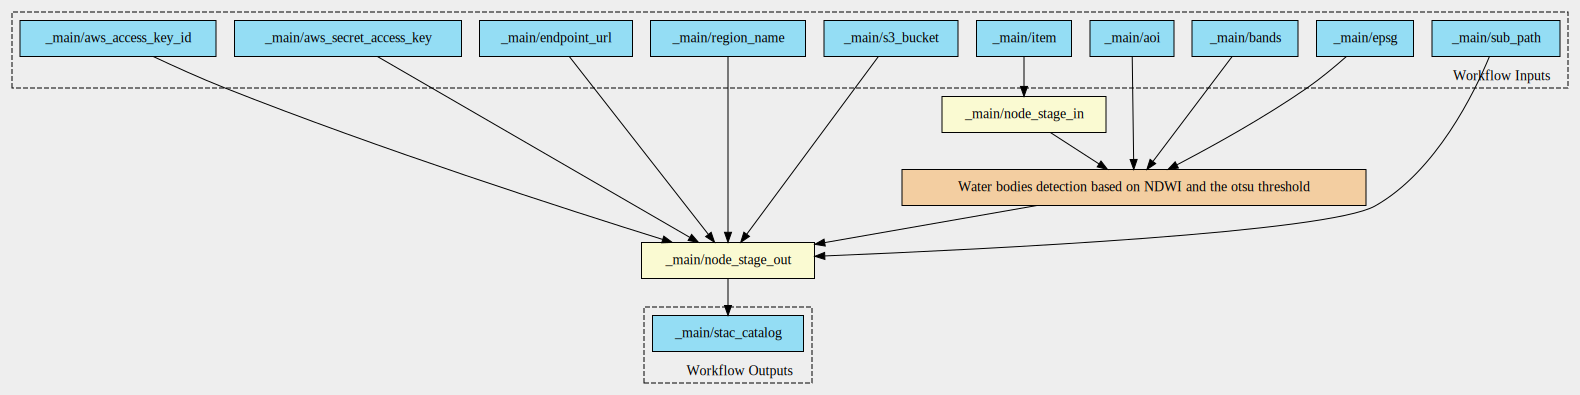

In [3]:
with tempfile.NamedTemporaryFile(suffix=".cwl", mode="w", delete=True) as tmp:
    tmp.write(wrap_cwl(app_cwl_file, "water-bodies-detection"))
    tmp.flush()
    
    viz = plot_cwl(tmp.name, entrypoint="_main")
graphviz.Source(viz)

In [4]:
res = wrap_cwl(app_cwl_file, "water-bodies-detection")


True


In [5]:
res
with open("wrapped.cwl", "w") as f:
    f.write(res)

## Read the parameters

In [21]:

res = wrap_cwl(app_cwl_file, "water-bodies-detection")
cwl_dict = yaml.safe_load(StringIO(res))

# baseuri just needs to not interfere
workflow = load_document(cwl_dict, baseuri="file:///", id_="_main")

In [22]:
md = "## Inputs\n"

for inp in workflow.inputs:
    
    md += f"- `{inp.id.replace("file:///#_main/", "")}`: {inp.type_}\n"

display(Markdown(md))

## Inputs
- `aoi`: string
- `aws_access_key_id`: string
- `aws_secret_access_key`: string
- `bands`: <cwl_utils.parser.cwl_v1_0.InputArraySchema object at 0x7e813685d950>
- `endpoint_url`: string
- `epsg`: string
- `item`: string
- `region_name`: string
- `s3_bucket`: string
- `sub_path`: string


In [23]:
md = "## Outputs\n"

for inp in workflow.outputs:
    
    md += f"- `{inp.id.replace("file:///#_main/", "")}`: {inp.type_}\n"

display(Markdown(md))

## Outputs
- `stac_catalog`: string


In [24]:
with open(app_cwl_file, "r") as f:
    cwl_dict = yaml.safe_load(f)

#cwl_dict = yaml.safe_load(StringIO(res))

# baseuri just needs to not interfere
workflow = load_document(cwl_dict, baseuri="file:///", id_="water-bodies-detection")

In [25]:
md = "## Inputs\n"

for inp in workflow.inputs:
    
    md += f"- `{inp.id.replace("file:///#water-bodies-detection/", "")}`: {inp.type_}\n"

display(Markdown(md))

## Inputs
- `aoi`: string
- `epsg`: string
- `bands`: <cwl_utils.parser.cwl_v1_0.InputArraySchema object at 0x7e81373275c0>
- `item`: Directory


In [26]:
md = "## Outputs\n"

for inp in workflow.outputs:
    
    md += f"- `{inp.id.replace("file:///#water-bodies-detection/", "")}`: {inp.type_}\n"

display(Markdown(md))

## Outputs
- `stac_catalog`: Directory
